In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
cent=pd.read_csv('census.csv')
cent.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [3]:
def change(x):
    if x=='>50K':
        return 1
    else:
        return 0

In [4]:
cent['income']=cent['income'].apply(change)   

In [5]:
cent.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0


In [6]:
y=cent.income
x=cent.drop('income',axis=1)


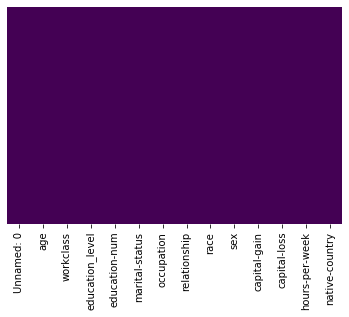

In [7]:
cenv=pd.read_csv('test_census.csv')
sn.heatmap(cenv.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [8]:
cenv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
Unnamed: 0         45222 non-null int64
age                45205 non-null float64
workclass          45200 non-null object
education_level    45202 non-null object
education-num      45208 non-null float64
marital-status     45201 non-null object
occupation         45200 non-null object
relationship       45206 non-null object
race               45203 non-null object
sex                45203 non-null object
capital-gain       45207 non-null float64
capital-loss       45205 non-null float64
hours-per-week     45209 non-null float64
native-country     45206 non-null object
dtypes: float64(5), int64(1), object(8)
memory usage: 3.5+ MB


In [9]:
cenv.isnull().sum()

Unnamed: 0          0
age                17
workclass          22
education_level    20
education-num      14
marital-status     21
occupation         22
relationship       16
race               19
sex                19
capital-gain       15
capital-loss       17
hours-per-week     13
native-country     16
dtype: int64

In [10]:
cenv.columns

Index(['Unnamed: 0', 'age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [11]:
cenv.head()

,Unnamed: 0,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0,21.0,Private,10th,6.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States
1,1,49.0,Private,Bachelors,13.0,Married-civ-spouse,Adm-clerical,Wife,White,Female,0.0,0.0,40.0,United-States
2,2,44.0,Self-emp-not-inc,Assoc-acdm,12.0,Married-civ-spouse,Other-service,Wife,White,Female,0.0,0.0,99.0,United-States
3,3,34.0,Private,Bachelors,13.0,Married-civ-spouse,Sales,Husband,White,Male,7298.0,0.0,46.0,United-States
4,4,24.0,Private,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States


In [12]:
cenv=cenv.drop('Unnamed: 0',axis=1)

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [14]:
numc=[col for col in x.columns if x[col].dtype in ['int64','float64']]
catc=[col for col in x.columns if x[col].nunique()<10 and x[col].dtype in['object']]

In [15]:
num=SimpleImputer(strategy='mean')
cat=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore',sparse=False))
])

In [16]:
preprocessor=ColumnTransformer(transformers=[
    ('num',num,numc),
    ('cat',cat,catc)
])

In [17]:
model=SVC(gamma='auto')
models=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',model)
])

In [18]:
models.fit(x,y)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='mean',
                                                                verbose=0),
                                                  ['age', 'education-num',
                                                   'capital-gain',
                                                   'capital-loss',
             

In [19]:

score=-1*cross_val_score(models,x,y,cv=4,scoring='neg_mean_absolute_error')
score.mean()

0.14453143086538106

In [20]:
pred=models.predict(cenv)

In [21]:
output = pd.DataFrame({'id': cenv.index,
                       'income': pred})
output.to_csv('submission.csv', index=False)

In [22]:
len(pred)

45222